1. Import Necessary Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Handling imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# For displaying all columns
pd.set_option('display.max_columns', None)


2. Load the Dataset

In [90]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

# Display first few rows
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

3. Exploratory Data Analysis (EDA)

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Column Names:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Statistical Summary:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.51625

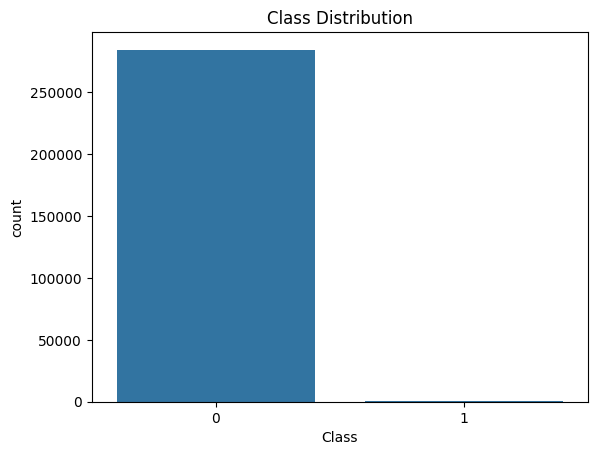

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Display the actual column names to troubleshoot
print("\nColumn Names:")
print(data.columns)

# Statistical summary
print("\nStatistical Summary:")
print(data.describe())

# Adjust 'Class' if the actual column name is different
# Let's assume your class column is named differently, e.g., 'label'
# Use the correct column name based on your output
class_column_name = 'Class'  # Change this if the actual name is different
if class_column_name in data.columns:
    print("\nClass Distribution:")
    print(data[class_column_name].value_counts())

    # Visualize class distribution
    sns.countplot(x=class_column_name, data=data)
    plt.title('Class Distribution')
    plt.show()
else:
    print(f"The column '{class_column_name}' does not exist in the DataFrame.")


4. Data Preprocessing

a. Feature Scaling

In [92]:
# Features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


b. Handling Class Imbalance

In [93]:
# Check the imbalance
print("Before Resampling:")
print(y.value_counts())

# Define the resampling strategy
smote = SMOTE(random_state=42)

# Apply SMOTE to the scaled data
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the new class distribution
print("After Resampling:")
print(pd.Series(y_resampled).value_counts())


Before Resampling:
Class
0    284315
1       492
Name: count, dtype: int64
After Resampling:
Class
0    284315
1    284315
Name: count, dtype: int64


5. Split the Dataset

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_resampled
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (398041, 30)
Testing set size: (170589, 30)


6. Train Classification Models

a. Logistic Regression

In [95]:
# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log = log_reg.predict(X_test)


b. Random Forest

In [96]:
rf_clf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1, verbose=2)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Print classification report and confusion matrix
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   15.8s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   23.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Random Forest Confusion Matrix:
[[85276    19]
 [    0 85294]]


7. Evaluate Model Performance

a. Logistic Regression Evaluation

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85295
           1       0.97      0.92      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



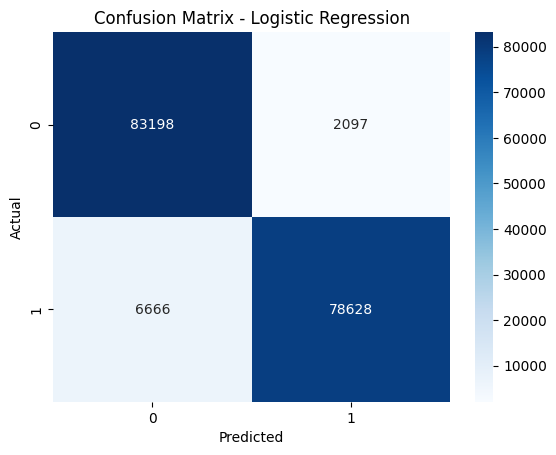

ROC-AUC Score: 0.9898


In [97]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score
roc_log = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
print(f"ROC-AUC Score: {roc_log:.4f}")


b. Random Forest Evaluation

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



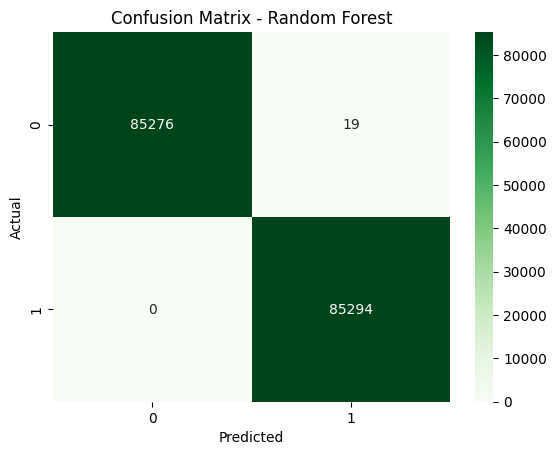

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


ROC-AUC Score: 1.0000


In [98]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score
roc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1])
print(f"ROC-AUC Score: {roc_rf:.4f}")


8. Hyperparameter Tuning (Optional)

a. Logistic Regression Hyperparameter Tuning

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Sample smaller subset for initial testing
X_sample = X.sample(frac=0.1, random_state=42)  
y_sample = y.loc[X_sample.index]

# Define the hyperparameter space
param_dist_rf = {
    'n_estimators': [10, 20, 50],  # Fewer options
    'max_depth': [None, 5],  # Reduced depth
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up RandomizedSearchCV
grid_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                              param_distributions=param_dist_rf, 
                              n_iter=3,  # Fewer iterations
                              cv=2,
                              verbose=1,
                              n_jobs=-1)

# Fit the model
grid_rf.fit(X_sample.astype('float32'), y_sample)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best F1 Score:", grid_rf.best_score_)


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best parameters for Random Forest: {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best F1 Score: 0.9990871181010045


b. Random Forest Hyperparameter Tuning

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Reduced parameter grid
param_grid_rf = {
    'n_estimators': [10, 50],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf, 
                       cv=2,  # Reduced to 2 folds
                       scoring='f1', 
                       n_jobs=1,  # Limit to 1 job
                       verbose=3)  # Verbosity to track progress

# Sample a subset of the data (if needed)
X_sample, y_sample = X_train.sample(frac=0.1, random_state=42), y_train.sample(frac=0.1, random_state=42)

# Fit GridSearch
grid_rf.fit(X_sample, y_sample)

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best F1 Score:", grid_rf.best_score_)


Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.991 total time=   2.1s
[CV 2/2] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.993 total time=   2.1s
[CV 1/2] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.995 total time=  10.8s
[CV 2/2] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.995 total time=   9.6s
[CV 1/2] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.992 total time=   1.8s
[CV 2/2] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.992 total time=   2.1s
[CV 1/2] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.995 total time=  11.9s
[CV 2/2] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.995 total 